# 1. Introduction
Nama : Angelin Cathi Karlina  
Batch : 005  

The Telco customer churn data contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3. It indicates which customers have left, stayed, or signed up for their service.

Customer churn is the percentage of customers that stopped using your company’s product or service during a certain time frame.

About the Dataset :  
- CustomerID: A unique ID that identifies each customer.
- Gender: The customer’s gender: Male, Female
- Senior Citizen: Indicates if the customer is 65 or older: Yes, No
- Partner : Whether the customer has a partner or not (Yes, No)
- Dependents : Whether the customer has dependents or not (Yes, No)
- tenure : Number of months the customer has stayed with the company
- PhoneService : Whether the customer has a phone service or not (Yes, No)
- MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract : The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges : The amount charged to the customer monthly
- TotalCharges : Indicates the customer’s total charges, calculated to the end of the quarter.
- Churn : Whether the customer churned or not (Yes or No)


# 2. Import Modules

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout
from keras.constraints import maxnorm

import warnings
warnings.filterwarnings('ignore')

# 3. Data Loading

In [2]:
df_raw = pd.read_csv('/Users/angel/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print(f'Dataset terdiri dari {df_raw.shape[0]} baris dan {df_raw.shape[1]} kolom')

Dataset terdiri dari 7043 baris dan 21 kolom


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- Dataset yang digunakan memiliki 3 data numerik (1 float, 2 integer) dan 18 data objek.
- `TotalCharges` terbaca sebagai data object, padahal seharusnya merupakan data float. Selanjutnya akan dilakukan penelusuran lebih lanjut.

In [5]:
#deskripsi statistik kolom numerik
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


- `SeniorCitizen` memiliki mean 0.16 dengan nilai max 1, kemungkinan data ini skew kanan.
- `tenure` memiliki nilai median lebih kecil daripada mean, kemungkinan data ini skew kanan.
- `MonthlyCharges` memiliiki nilai mean dan median yang tidak jauh berbeda, kemungkinan data terdistribusi normal.

In [6]:
#deskripsi kolom kategorik
df_raw.select_dtypes(object).describe()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,9743-DQKQW,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


- `customerID` merupakan data unik, sehingga tidak memberikan informasi yang berarti.
- `gender`, `Partner`, `Dependents`, `PhoneService`, `PaperlessBilling`, dan `Churn` memiliki 2 kelompok kategori yang dapat direpresentasikan dengan boolean.
- `TotalCharges` tidak seharusnya masuk ke dalam kategori objek, proses penanganan kolom ini akan dilakukan pada bab 4.

# 4. Data Cleaning

### Missing Values

In [7]:
print(f'jumlah missing values : {df_raw.isnull().values.sum()}')

jumlah missing values : 0


### Duplicated Data

In [8]:
#deteksi data duplikat
print('banyaknya data terduplikasi :', df_raw.duplicated().sum())

banyaknya data terduplikasi : 0


- Tidak terdapat missing values dan data terduplikat pada dataset, sehingga tidak diperlukan tindakan apapun.

###  Identifikasi Kolom `TotalCharges`
- Pada dataframe tampak bahwa kolom ini memiliki data angka, namun kolom ini masuk dalam kategori objek.
- Langkah selanjutnya yang akan diambil dapat berupa imputasi nilai maupun drop data yang hilang.

In [9]:
df_raw['TotalCharges'].value_counts().sort_index()

          11
100.2      1
100.25     1
100.35     1
100.4      1
          ..
997.75     1
998.1      1
999.45     1
999.8      1
999.9      1
Name: TotalCharges, Length: 6531, dtype: int64

Terdapat 11 data kosong pada kolom `TotalCharges`.

In [10]:
#identifikasi data yang kosong
df_raw[df_raw['TotalCharges']==' '].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


- Data `TotalCharges` yang kosong memiliki nilai `tenure` 0, yang mana menandakan bahwa data tersebut adalah data pelanggan baru.
- Selanjutnya data kosong akan diisi dengan nilai 0, karena pelanggan baru belum dikenai biaya apapun.

In [11]:
#ubah data menjadi float dan replace data kosong dengan nilai 0
df_raw['TotalCharges']=df_raw['TotalCharges'].str.replace(' ', '0').astype('float32')

In [12]:
df_raw[['TotalCharges']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TotalCharges  7043 non-null   float32
dtypes: float32(1)
memory usage: 27.6 KB


### Pengubahan Nama Kolom (Opsional)
- Penamaan kolom pada dataframe tidak konsisten, sehingga perlu penyesuaian agar penamaan kolom menjadi seragam.
- Semua nama kolom akan diubah dalam bentuk snake_case.

In [13]:
#daftar nama kolom
df_raw.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
#ubah nama kolom
df_raw1 = df_raw.rename({
    'customerID':'cust_ID', 'SeniorCitizen':'senior_citizen', 'Partner':'partner', 'Dependents' : 'dependents', 
    'PhoneService':'phone_service', 'MultipleLines':'multiple_lines', 'InternetService':'internet_service', 
    'OnlineSecurity':'online_security', 'OnlineBackup':'online_backup', 'DeviceProtection':'device_protection',
    'TechSupport':'tech_support', 'StreamingTV':'streaming_tv', 'StreamingMovies':'streaming_movies', 
    'Contract':'contract', 'PaperlessBilling':'paperless_billing', 'PaymentMethod':'payment_method',
    'MonthlyCharges':'monthly_charges','TotalCharges':'total_charges', 'Churn':'churn'
}, axis=1)

df_raw1.head(2)

,cust_ID,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


### Drop Kolom `cust_ID`
- Karena memiliki nilai unik, maka data pada `cust_ID` tidak memberikan informasi apapun pada proses pengolahan data selanjutnya.
- Dataframe baru akan dibuat agar kolom `cust_ID` masih dapat dipanggil jika diperlukan.

In [15]:
df = df_raw1.drop('cust_ID', axis=1)

In [16]:
df.head(2)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


### Deteksi Outliers

<AxesSubplot:>

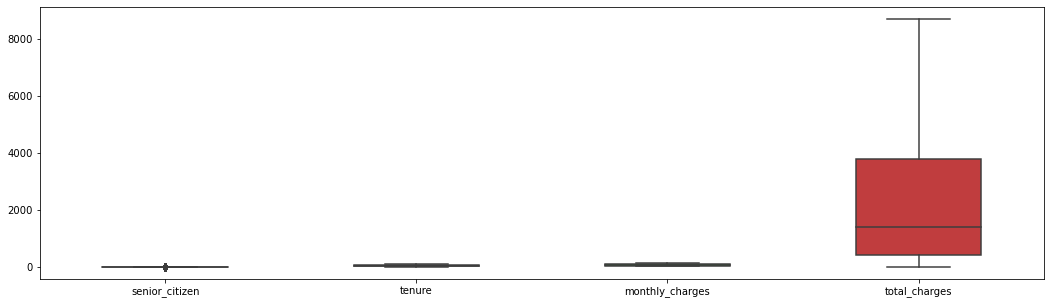

In [17]:
#visulisasi data mentah sebelum dilakukan handling outliers.
fig, ax = plt.subplots(figsize=(18,5))
sns.boxplot(data=df, width= 0.5, ax=ax,  fliersize=5)

- Tidak ditemukan outliers pada dataset, sehingga tidak diperlukan proses handling outlier.

# 5. Data Exploration

### Distribusi Data

In [18]:
#golongkan dataframe menjadi dataframe numerik dan kategorik
df_num = df[df.select_dtypes('number').columns]
df_cat = df[df.select_dtypes('object').columns]

,senior_citizen,tenure,monthly_charges,total_charges
0,1.833633,0.23954,-0.220524,0.963235


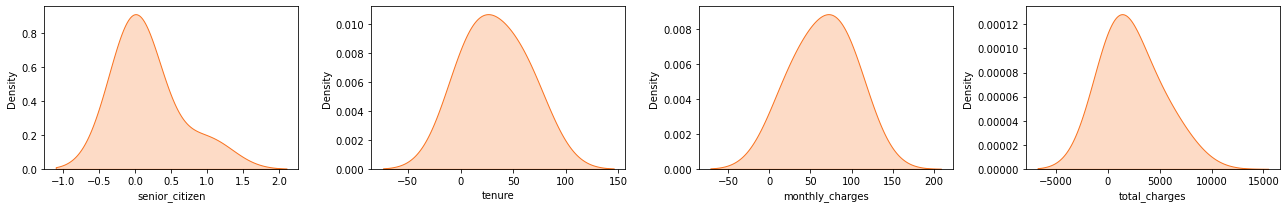

In [19]:
#kdeplot
plt.figure(figsize=(18,3))
plotnumber= 1

for columns in df_num:
    if plotnumber<=4:
        ax= plt.subplot(1,4, plotnumber)
        sns.kdeplot(df_num[columns], bw= 1, color='#F9721F', shade = True)
        plt.xlabel(columns, fontsize= 10)
    plotnumber += 1

plt.tight_layout()

#skewness dataframe
pd.DataFrame(df_num.skew()).T

- Sebaran data cenderung normal
- `senior_citizen` dan `total_charges` cenderung skew kanan

### Eksplorasi Data Target - `churn`

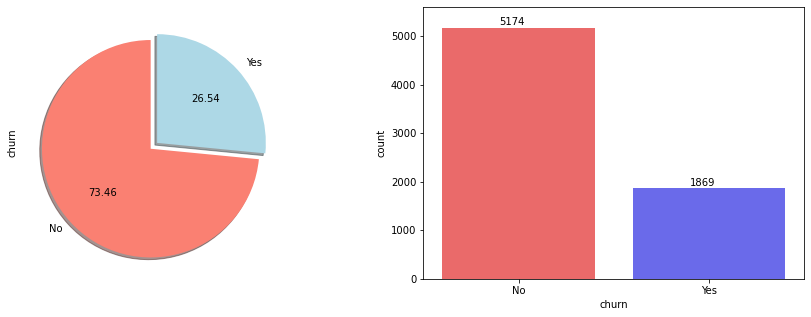

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

#piechart - persentase churn
df['churn'].value_counts().plot.pie(autopct='%.2f', explode = [0.08,0], startangle=90, 
                                    colors=['salmon','lightblue'], shadow = True, ax=ax[0])

#barplot - nilai churn
ax[1] = sns.countplot(data = df, x = 'churn', palette='seismic_r')
for p in ax[1].patches:
   ax[1].annotate('{:}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))

plt.ylim(0,5600)
plt.show()

##### Customer churn :
- Terdapat 5174 pelanggan (73.46%) melanjutkan berlangganan.
- Sebanyak 1869 pelanggan (26.53%) yang berhenti berlangganan.
- Rasio churn No : Yes adalah sekitar 1:3 yang mengindikasikan data tersebut _slightly imbalance_.

### Eksplorasi Data Kategorikal

In [21]:
#daftar kolom kategorikal
df_cat.columns

Index(['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract', 'paperless_billing', 'payment_method', 'churn'],
      dtype='object')

#### Informasi Personal - Gender, Partner, Dependents

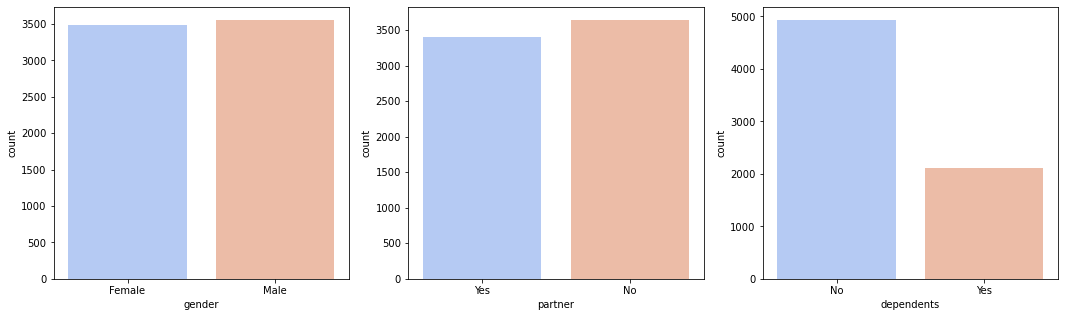

In [22]:
plt.figure(figsize=(18,5))
plotnumber= 1
df_cat_personal = df_cat[['gender', 'partner', 'dependents']]
for columns in df_cat_personal:
    if plotnumber<=3:
        ax= plt.subplot(1,3, plotnumber)
        sns.countplot(df_cat_personal[columns], palette = 'coolwarm')
        plt.xlabel(columns, fontsize= 10)
    plotnumber += 1

#plt.tight_layout()

- Fitur `gender` dan `partner memiliki sebaran data yang cukup seimbang.
- `dependents` : sebagian besar customers tidak memilki tanggungan.

#### Layanan (Services)
phone_service,  multiple_lines,  internet_service,   online_security,  online_backup, device_protection, tech_support, streaming_tv , streaming_movies.

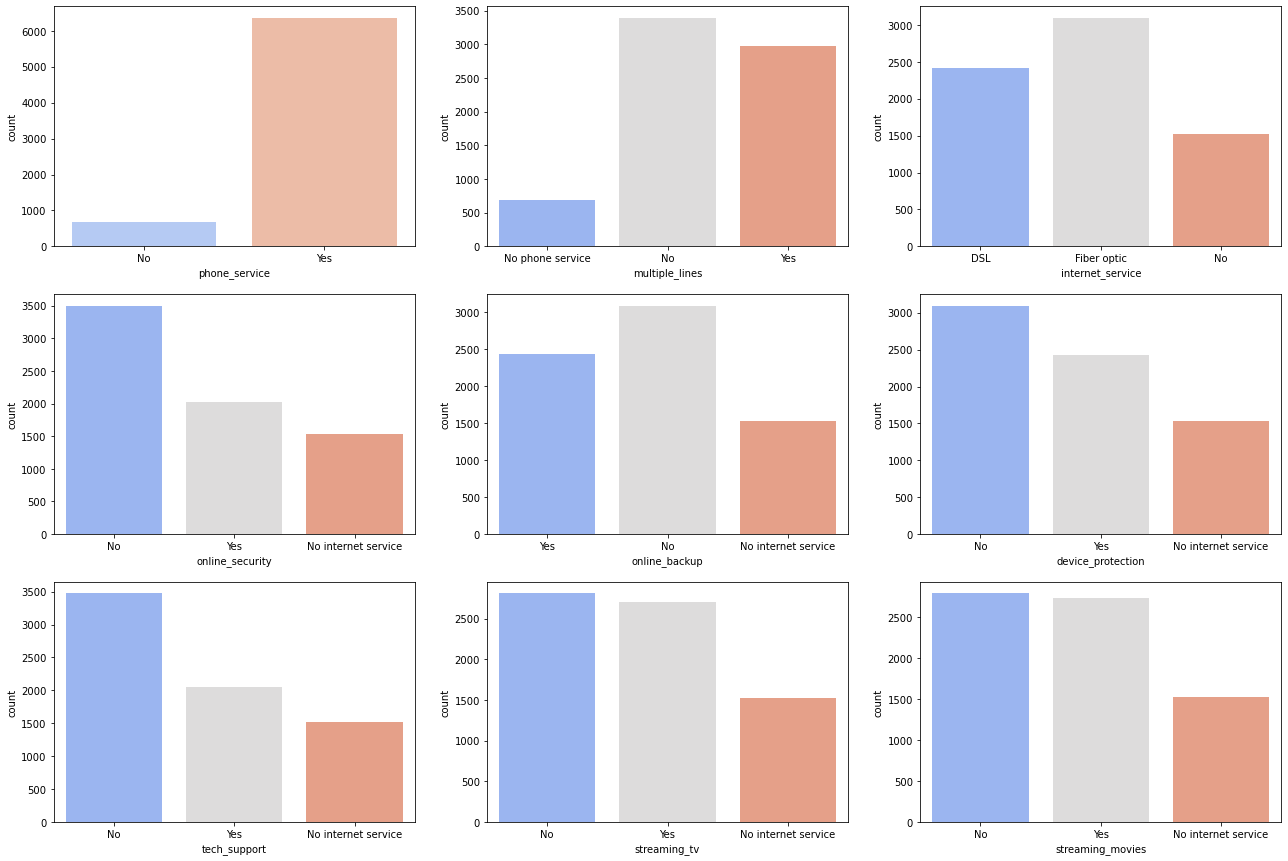

In [23]:
plt.figure(figsize=(22,15))
plotnumber= 1
df_cat_services = df_cat[['phone_service', 'multiple_lines', 'internet_service', 'online_security', 'online_backup',
                          'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']]

for columns in df_cat_services:
    if plotnumber<=9:
        ax= plt.subplot(3,3, plotnumber)
        sns.countplot(df_cat_services[columns], palette = 'coolwarm')
        plt.xlabel(columns, fontsize= 10)
    plotnumber += 1

- Untuk pelanggan yang memiliki layanan telepon, lebih banyak pelanggan yang tidak memiliki multiple lines (namun tidak signifikan perbedaannya)
- sebagian besar pelanggan memiliki layanan internet dengan fiber optic
- Hanya sedikit pelanggan yang memiliki layanan online_security, online_backup, device protection dan tech support.

### Payment and Billing

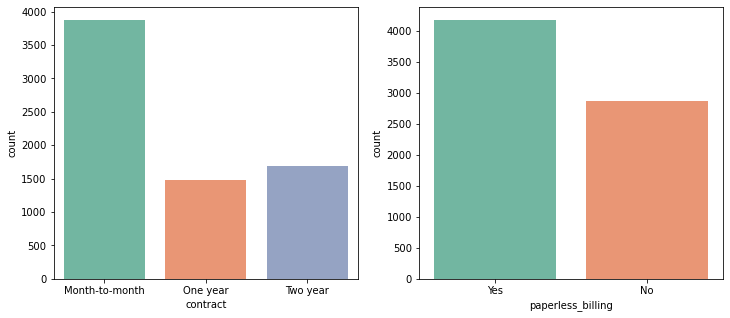

In [24]:
plt.figure(figsize=(12,5))
plotnumber= 1
df_cat_pay = df_cat[['contract', 'paperless_billing']]
for columns in df_cat_pay:
    if plotnumber<=2:
        ax= plt.subplot(1,2, plotnumber)
        sns.countplot(df_cat_pay[columns], palette = 'Set2')
        plt.xlabel(columns, fontsize= 10)
    plotnumber += 1

- Kebanyakan pelanggan memilih kontrak bayaran per bulan dari pada per tahun atau per dua tahun.
- Lebih banyak yang menggunakan paperless billing.

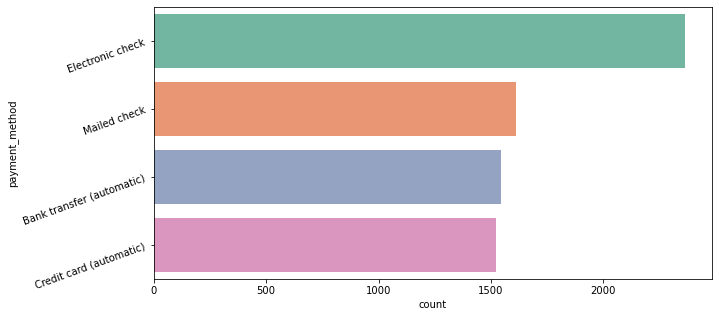

In [25]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, y='payment_method', palette = 'Set2')
plt.yticks(rotation=20)
plt.show()

- Sebagian besar pelanggan melakukan pembayaran menggunakan electronic check.

### Pelanggan Layanan Telepon tanpa Internet

In [26]:
df_noint = df[df['internet_service']=='No']
df_noint.head(2)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
11,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.799988,No
16,Female,0,No,No,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.950012,No


In [27]:
df_noint.describe().T

,count,mean,std,min,25%,50%,75%,max
senior_citizen,1526.0,0.034076,0.181484,0.00,0.000000,0.000000,0.000000,1.000000
tenure,1526.0,30.547182,24.356507,0.00,8.000000,25.000000,52.750000,72.000000
monthly_charges,1526.0,21.079194,2.164221,18.25,19.700000,20.150000,20.900000,26.900000
total_charges,1526.0,662.604858,555.627258,0.00,157.824997,519.199982,1108.650024,2006.949951


- Pelanggan yang hanya menggunakan layanan telepon tanpa internet rata-rata hanya membayar 662 setiap akhir kuartal, sedangkan rata-rata yang dibayarkan pelanggan secara keseluruhan adalah sekitar 2279, yang berarti pelanggan yang hanya menggunakan layanan telepon hanya membayar sekitar 30% dari rata-rata seluruh pelanggan lainnya.

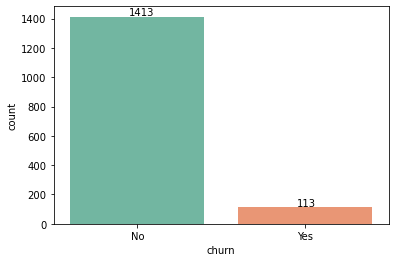

In [28]:
ax = sns.countplot(data = df_noint, x = 'churn', palette = 'Set2')
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+10))

- Hanya sekitar 1:12 pelanggan yang hanya berlangganan layanan telepon yang churn.

### Senior Citizen

In [29]:
df_senior = df[df['senior_citizen']==1]

In [30]:
df_senior.describe().T

,count,mean,std,min,25%,50%,75%,max
senior_citizen,1142.0,1.000000,0.000000,1.000000,1.000000,1.00,1.000000,1.000000
tenure,1142.0,33.295972,24.188530,1.000000,10.000000,31.00,56.000000,72.000000
monthly_charges,1142.0,79.820359,23.764027,18.950000,70.150000,84.85,98.075000,117.450000
total_charges,1142.0,2810.463623,2364.313965,19.450001,689.575012,2263.75,4600.312622,8443.700195


- Senior citizen memiliki `total_charge` lebih tinggi dari pada rata-rata keseluruhan customers
    - senior mean total_charges = 2810.46
    - overall mean total_charges = 2279.732

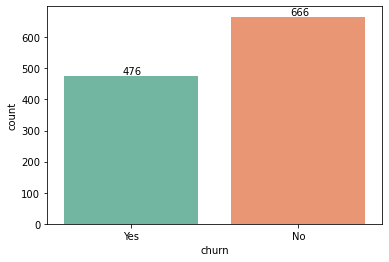

In [31]:
ax = sns.countplot(data = df_senior, x='churn', palette = 'Set2')
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+5))

#### Senior Citizen Churn Rate :
- Berbeda dengan kelompok usia lainnya, senior citizen memiliki tingkat churn rate yang relatif lebih tinggi dengan perandingan 'Yes' : 'No' = 476 : 666 atau sekitar 5 : 7.
- Kelompok ini perlu perhatian khusus untuk menurunkan churn rate.

<AxesSubplot:xlabel='churn', ylabel='count'>

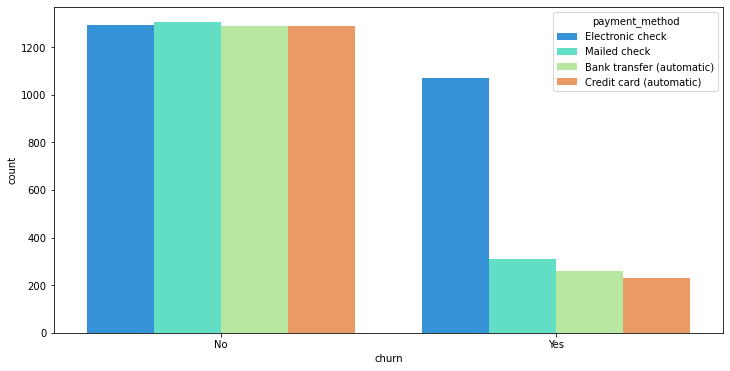

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(data = df, x='churn', hue = 'payment_method', palette = 'rainbow')

- Pelanggan yang churned (berhenti berlangganan) cenderung menggunakan payment method berupa electronic check

### Multicollinearity

Text(0.5, 1.05, 'Spearman correlation of Features')

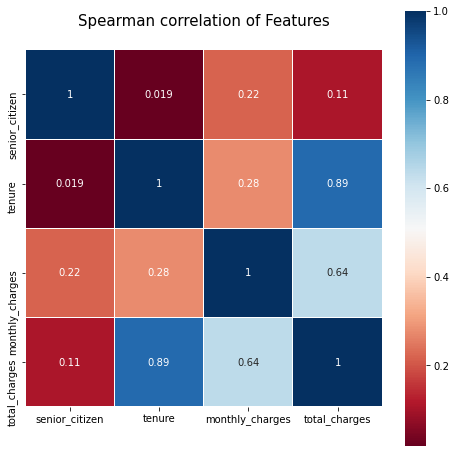

In [33]:
df_features = df.drop('churn',axis=1)
corr = df_features.corr(method="spearman")
f, ax = plt.subplots(figsize=(8,8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
_ = sns.heatmap(corr, cmap="RdBu", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Spearman correlation of Features", y=1.05, size=15)

- `tenure` dan `total_charge` memiliki multicollinearity yang tinggi
- Selanjutnya proses ini akan dilanjutkan dengan VIF

# 6. Data Preprocessing

In [34]:
vif = pd.DataFrame()

vif['features'] = df_features.select_dtypes('number').columns
vif['VIF'] = [variance_inflation_factor(df_features.select_dtypes('number').values, i) for i in range(len(vif))]
vif.T

,0,1,2,3
features,senior_citizen,tenure,monthly_charges,total_charges
VIF,1.257276,6.332627,3.694794,8.080935


- `total_charges` memiliki  nilai VIF yang cukup tinggi, hal ini dikarenakan fitur ini sangat dipengaruhi oleh `tenure` dan `monthly_charges`.

In [35]:
vif = pd.DataFrame()
vif['features'] = df_features.select_dtypes('number').drop(columns=['total_charges']).columns
vif['VIF'] = [variance_inflation_factor(df_features.select_dtypes('number').drop(columns=['total_charges']).values, i) for i in range(len(vif))]
vif.T

,0,1,2
features,senior_citizen,tenure,monthly_charges
VIF,1.256364,2.617403,2.924996


- Setelah melakukan drop kolom `total_charges`, nilai VIF pada `tenure` berkurang cukup signifikan.

In [36]:
df.drop('total_charges', axis =1, inplace = True)

### Train-Test Split

In [37]:
df_trainval, df_test = train_test_split(df, test_size=0.2, random_state=42, stratify = df['churn'])

print('df_trainval shape :',df_trainval.shape)
print('df_test shape:',df_test.shape)

df_trainval shape : (5634, 19)
df_test shape: (1409, 19)


In [38]:
#ambil fitur kategorik dalam bentuk string/object
objList = df_trainval.select_dtypes(include = "object").columns
print (objList)

Index(['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract', 'paperless_billing', 'payment_method', 'churn'],
      dtype='object')


In [39]:
#Label Encoding object menjadi numeric - TRAIN
str_cat = ['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract', 'paperless_billing', 'payment_method', 'churn']

le = LabelEncoder()
for feat in str_cat:
    df_trainval[feat] = le.fit_transform(df_trainval[feat].astype(str))

df_trainval.head(3)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,churn
3738,1,0,0,0,35,0,1,0,0,0,2,0,2,2,0,0,2,49.20,0
3151,1,0,1,1,15,1,0,1,2,0,0,0,0,0,0,0,3,75.10,0
4860,1,0,1,1,13,0,1,0,2,2,0,2,0,0,2,0,3,40.55,0


In [40]:
#Label Encoding object menjadi numeric - TEST
for feat in str_cat:
    df_test[feat] = le.fit_transform(df_test[feat].astype(str))

df_test.head(3)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,churn
437,1,0,1,1,72,1,2,1,2,2,2,2,2,2,2,1,1,114.05,0
2280,0,1,0,0,8,1,2,1,0,0,0,2,2,2,0,1,1,100.15,0
2235,0,0,1,1,41,1,2,0,2,2,2,0,2,0,1,1,1,78.35,0


## Split Data Train, Val dan Test dalam X dan y

In [41]:
#split data train menjadi data train dan validation
df_train, df_val = train_test_split(df_trainval, test_size=0.2, random_state=42, stratify = df_trainval['churn'])

#split data ke X dan y
X_train = df_train.drop('churn', axis = 1)
X_val = df_val.drop('churn', axis = 1)
X_test = df_test.drop('churn', axis = 1)

y_train = df_train['churn']
y_val = df_val['churn']
y_test = df_test['churn']


print('X_train shape :',X_train.shape)
print('X_val shape:',X_val.shape)
print('X_test shape :',X_test.shape)

X_train shape : (4507, 18)
X_val shape: (1127, 18)
X_test shape : (1409, 18)


In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

### Input Pipeline

In [44]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(X_train)

In [45]:
normalizer(X_train)

<tf.Tensor: shape=(4507, 18), dtype=float32, numpy=
array([[ 0.99226385, -0.43927127, -0.96618056, ..., -1.2145013 ,
        -0.53915703, -0.17476001],
       [ 0.99226385,  2.2764978 ,  1.0350032 , ...,  0.82338333,
        -1.4726892 ,  1.7109936 ],
       [ 0.99226385, -0.43927127,  1.0350032 , ..., -1.2145013 ,
        -0.53915703,  1.6526886 ],
       ...,
       [-1.0077963 , -0.43927127, -0.96618056, ...,  0.82338333,
        -0.53915703, -0.6711864 ],
       [-1.0077963 , -0.43927127, -0.96618056, ...,  0.82338333,
         1.327907  , -0.48960754],
       [ 0.99226385, -0.43927127,  1.0350032 , ...,  0.82338333,
         0.394375  ,  0.9896761 ]], dtype=float32)>

In [46]:
train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_batches = train.shuffle(500).batch(128)

---

# 7. Defining the Model

- Activation function yang digunakan adalah ReLu karena simpel dan cepat. 
- Secara empiris, terdapat riset yang menyatakan bahwa training deep network dengan ReLu cenderung lebih cepat converge.
- Khusus output akan menggunakan activation function sigmoid karena pemodelan dilakukan untuk binary classification.
- Unit yang digunakan tiap hidden layer menggunakan prinsip umum, yang mana berada pada rentang nilai input dan output.

## Sequential ANN

In [47]:
def get_basic_model():
  model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(8, input_shape=(18,), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

In [48]:
model = get_basic_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 18)               37        
 n)                                                              
                                                                 
 dense (Dense)               (None, 8)                 152       
                                                                 
 batch_normalization (BatchN  (None, 8)                32        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 batch_normalization_1 (Batc  (None, 4)                16        
 hNormalization)                                                 
                                                        

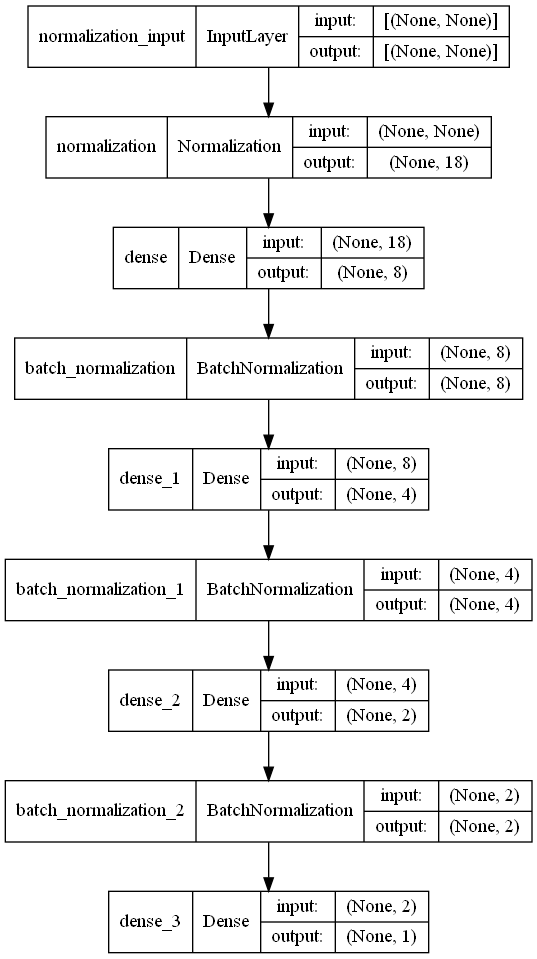

In [49]:
tf.keras.utils.plot_model(model, show_shapes=True)

## Functional API ANN

In [50]:
tf.keras.backend.clear_session

<function keras.backend.clear_session()>

In [51]:
#Build the architecture
input_ = keras.layers.Input(shape=[18])
nor1 = keras.layers.BatchNormalization()(input_)
hid1 = keras.layers.Dense(16, activation='relu', kernel_initializer=keras.initializers.HeUniform(seed=42))(nor1)
con = keras.layers.concatenate([input_, hid1])

nor2 = keras.layers.BatchNormalization()(con)
hid2 = keras.layers.Dense(8, activation='relu', kernel_initializer=keras.initializers.HeUniform(seed=42))(nor2)

nor3 = keras.layers.BatchNormalization()(hid2)
hid3 = keras.layers.Dense(4, activation='relu', kernel_initializer=keras.initializers.HeUniform(seed=42))(nor3)

nor4 = keras.layers.BatchNormalization()(hid3)
hid4 = keras.layers.Dense(2, activation='relu', kernel_initializer=keras.initializers.HeUniform(seed=42))(nor4)

output_ = keras.layers.Dense(1, activation='sigmoid')(hid4)


In [52]:
model_func = keras.models.Model(inputs=[input_], outputs=[output_])
model_func.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 18)]         0           []                               
                                                                                                  
 batch_normalization_3 (BatchNo  (None, 18)          72          ['input_1[0][0]']                
 rmalization)                                                                                     
                                                                                                  
 dense_4 (Dense)                (None, 16)           304         ['batch_normalization_3[0][0]']  
                                                                                                  
 concatenate (Concatenate)      (None, 34)           0           ['input_1[0][0]',            

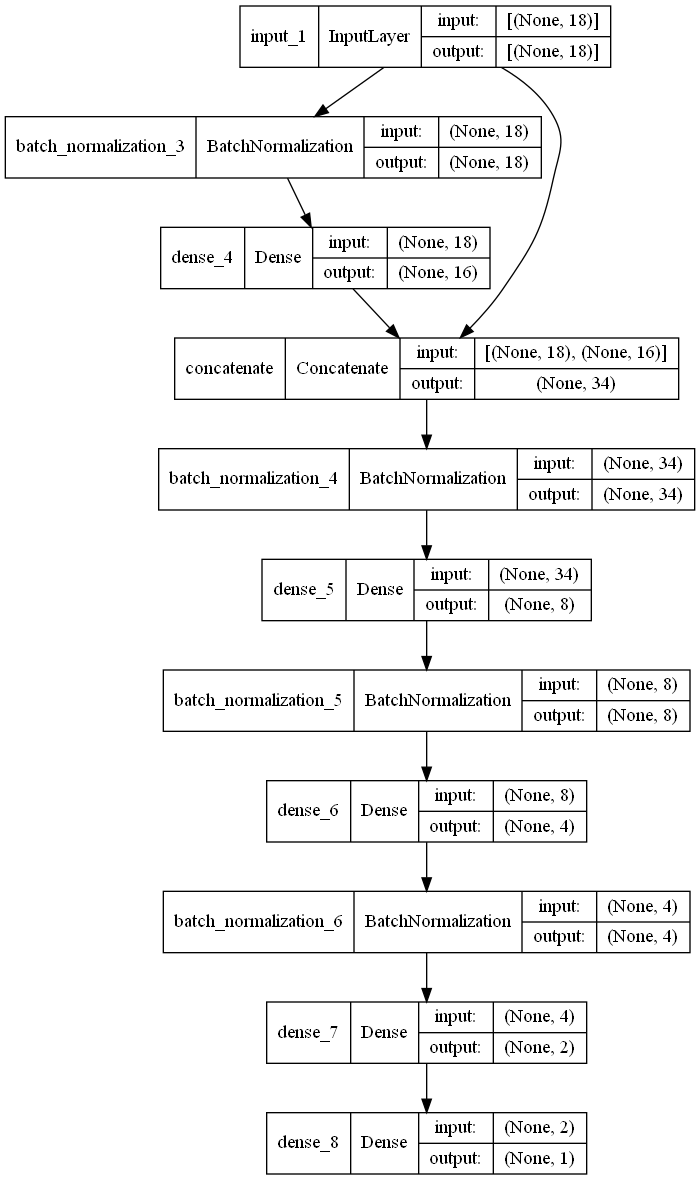

In [53]:
tf.keras.utils.plot_model(model_func, show_shapes=True)

# 8. Model Training

## Training Sequential Model

In [54]:
tf.keras.backend.clear_session

<function keras.backend.clear_session()>

In [55]:
history = model.fit(train_batches, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
36/36 [==============================] - 1s 8ms/step - loss: 0.6914 - accuracy: 0.6470 - val_loss: 0.6485 - val_accuracy: 0.7471
Epoch 2/100
36/36 [==============================] - 0s 4ms/step - loss: 0.6431 - accuracy: 0.6951 - val_loss: 0.6335 - val_accuracy: 0.7524
Epoch 3/100
36/36 [==============================] - 0s 4ms/step - loss: 0.6110 - accuracy: 0.7224 - val_loss: 0.6110 - val_accuracy: 0.7728
Epoch 4/100
36/36 [==============================] - 0s 4ms/step - loss: 0.5838 - accuracy: 0.7446 - val_loss: 0.5858 - val_accuracy: 0.7702
Epoch 5/100
36/36 [==============================] - 0s 4ms/step - loss: 0.5620 - accuracy: 0.7566 - val_loss: 0.5626 - val_accuracy: 0.7720
Epoch 6/100
36/36 [==============================] - 0s 4ms/step - loss: 0.5414 - accuracy: 0.7677 - val_loss: 0.5424 - val_accuracy: 0.7764
Epoch 7/100
36/36 [==============================] - 0s 4ms/step - loss: 0.5240 - accuracy: 0.7741 - val_loss: 0.5234 - val_accuracy: 0.7791
Epoch 8/100
3

Epoch 59/100
36/36 [==============================] - 0s 3ms/step - loss: 0.4073 - accuracy: 0.8021 - val_loss: 0.4268 - val_accuracy: 0.8012
Epoch 60/100
36/36 [==============================] - 0s 4ms/step - loss: 0.4051 - accuracy: 0.8014 - val_loss: 0.4268 - val_accuracy: 0.8004
Epoch 61/100
36/36 [==============================] - 0s 4ms/step - loss: 0.4052 - accuracy: 0.8041 - val_loss: 0.4267 - val_accuracy: 0.8004
Epoch 62/100
36/36 [==============================] - 0s 3ms/step - loss: 0.4074 - accuracy: 0.8043 - val_loss: 0.4263 - val_accuracy: 0.8012
Epoch 63/100
36/36 [==============================] - 0s 3ms/step - loss: 0.4062 - accuracy: 0.8016 - val_loss: 0.4263 - val_accuracy: 0.8030
Epoch 64/100
36/36 [==============================] - 0s 3ms/step - loss: 0.4063 - accuracy: 0.8052 - val_loss: 0.4269 - val_accuracy: 0.8048
Epoch 65/100
36/36 [==============================] - 0s 3ms/step - loss: 0.4050 - accuracy: 0.8028 - val_loss: 0.4262 - val_accuracy: 0.8021
Epoch 

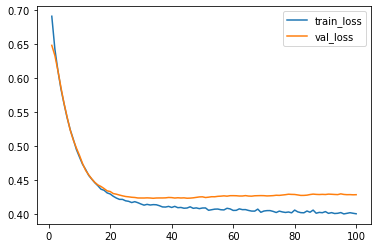

In [56]:
#Sequential model loss
x_axis  = np.arange(1,101)
plt.plot(x_axis, history.history['loss'], label='train_loss')
plt.plot(x_axis, history.history['val_loss'], label='val_loss')
plt.legend()

In [57]:
model.evaluate(X_test, y_test)

45/45 [==============================] - 0s 2ms/step - loss: 0.4295 - accuracy: 0.7970


[0.42946237325668335, 0.7970191836357117]

- Basic sequential model menghasilkan akurasi dan loss yang cukup baik, yaitu sebagai berikut :
     - train_loss: 0.4001 --- train_accuracy: 0.8083
     - val_loss: 0.4283   --- val_accuracy: 0.8012
     - test_loss : 0.4295 --- test_accuracy : 0.7970

## Training Functional API Model

In [58]:
tf.keras.backend.clear_session

<function keras.backend.clear_session()>

In [59]:
model_func.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])

In [60]:
history_func = model_func.fit(train_batches, epochs=100,
                      validation_data= (X_val,y_val))

Epoch 1/100
36/36 [==============================] - 1s 8ms/step - loss: 0.6503 - accuracy: 0.7342 - val_loss: 0.6293 - val_accuracy: 0.7382
Epoch 2/100
36/36 [==============================] - 0s 4ms/step - loss: 0.6009 - accuracy: 0.7417 - val_loss: 0.5684 - val_accuracy: 0.7338
Epoch 3/100
36/36 [==============================] - 0s 4ms/step - loss: 0.5614 - accuracy: 0.7437 - val_loss: 0.5178 - val_accuracy: 0.7374
Epoch 4/100
36/36 [==============================] - 0s 4ms/step - loss: 0.5271 - accuracy: 0.7455 - val_loss: 0.4854 - val_accuracy: 0.7374
Epoch 5/100
36/36 [==============================] - 0s 4ms/step - loss: 0.5003 - accuracy: 0.7495 - val_loss: 0.4694 - val_accuracy: 0.7471
Epoch 6/100
36/36 [==============================] - 0s 4ms/step - loss: 0.4800 - accuracy: 0.7579 - val_loss: 0.4609 - val_accuracy: 0.7657
Epoch 7/100
36/36 [==============================] - 0s 4ms/step - loss: 0.4668 - accuracy: 0.7744 - val_loss: 0.4548 - val_accuracy: 0.7755
Epoch 8/100
3

Epoch 59/100
36/36 [==============================] - 0s 4ms/step - loss: 0.3873 - accuracy: 0.8067 - val_loss: 0.4358 - val_accuracy: 0.7933
Epoch 60/100
36/36 [==============================] - 0s 4ms/step - loss: 0.3880 - accuracy: 0.8105 - val_loss: 0.4381 - val_accuracy: 0.7941
Epoch 61/100
36/36 [==============================] - 0s 4ms/step - loss: 0.3849 - accuracy: 0.8085 - val_loss: 0.4398 - val_accuracy: 0.7941
Epoch 62/100
36/36 [==============================] - 0s 4ms/step - loss: 0.3865 - accuracy: 0.8121 - val_loss: 0.4375 - val_accuracy: 0.7959
Epoch 63/100
36/36 [==============================] - 0s 4ms/step - loss: 0.3859 - accuracy: 0.8065 - val_loss: 0.4402 - val_accuracy: 0.7959
Epoch 64/100
36/36 [==============================] - 0s 4ms/step - loss: 0.3839 - accuracy: 0.8094 - val_loss: 0.4417 - val_accuracy: 0.7924
Epoch 65/100
36/36 [==============================] - 0s 4ms/step - loss: 0.3832 - accuracy: 0.8125 - val_loss: 0.4394 - val_accuracy: 0.7950
Epoch 

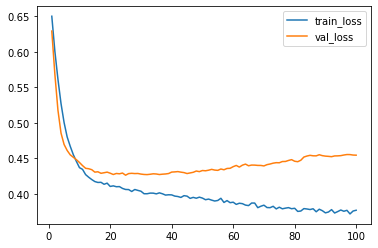

In [61]:
#functional API model loss
x_axis  = np.arange(1,101)
plt.plot(x_axis, history_func.history['loss'], label='train_loss')
plt.plot(x_axis, history_func.history['val_loss'], label='val_loss')
plt.legend()

In [62]:
model_func.evaluate(X_test, y_test)

45/45 [==============================] - 0s 2ms/step - loss: 0.4667 - accuracy: 0.7928


[0.4666546583175659, 0.7927608489990234]

- Basic Functional API model menunjukkan sedikit peningkatan pada akurasi bila dibandingkan dengan basic sequential model : 
     - train_loss: 0.3766 ----- train_accuracy: 0.8112 
     - val_loss  : 0.4543 ----- val_accuracy  : 0.7817
     - test_loss : 0.4666 ----- test_accuracy : 0.7927

---

# 9. Model Improvement and Evaluation

- Untuk meningkatkan performa, akan dilakukan grid search untuk melakukan hyperparameter tuning untuk tiap model
- Ditambahkan kernel_initializer, dropout_rate, dan weight_constraint
    - kernel_initializer define the way to set the initial random weights of Keras layers.
    - Dropout preventing complex co-adaptations on training data.
    - Weight constraints can improve generalization when used in conjunction with other regularization methods, like dropout.

## Sequential Model - Tuning

In [63]:
tf.keras.backend.clear_session

<function keras.backend.clear_session()>

In [64]:
# Function to create model, required for KerasClassifier

def get_basic_model(dropout_rate=0.0, weight_constraint=0, init_mode='uniform'):
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(13, input_shape=(18,), kernel_initializer=init_mode, kernel_constraint=maxnorm(weight_constraint),
                          activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(8, kernel_initializer=init_mode, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(4, kernel_initializer=init_mode, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(1, kernel_initializer=init_mode, activation='sigmoid')
  ])
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn = get_basic_model, epochs=100, batch_size=128, shuffle = 500)

# define the grid search parameters
init_mode = ['uniform', 'normal', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
weight_constraint = [1, 2, 3, 4]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
param_grid = dict(init_mode=init_mode, dropout_rate=dropout_rate, weight_constraint=weight_constraint)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Epoch 1/100
36/36 [==============================] - 1s 2ms/step - loss: 0.8133 - accuracy: 0.5560
Epoch 2/100
36/36 [==============================] - 0s 2ms/step - loss: 0.7346 - accuracy: 0.5851
Epoch 3/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6818 - accuracy: 0.6115
Epoch 4/100
36/36 [==============================] - 0s 3ms/step - loss: 0.6566 - accuracy: 0.6490
Epoch 5/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6210 - accuracy: 0.6829
Epoch 6/100
36/36 [==============================] - 0s 2ms/step - loss: 0.5967 - accuracy: 0.6892
Epoch 7/100
36/36 [==============================] - 0s 2ms/step - loss: 0.5737 - accuracy: 0.7116
Epoch 8/100
36/36 [==============================] - 0s 2ms/step - loss: 0.5564 - accuracy: 0.7264
Epoch 9/100
36/36 [==============================] - 0s 2ms/step - loss: 0.5505 - accuracy: 0.7402
Epoch 10/100
36/36 [==============================] - 0s 2ms/step - loss: 0.5327 - accuracy: 0.7570
Epoch 11/

36/36 [==============================] - 0s 3ms/step - loss: 0.4449 - accuracy: 0.7752
Epoch 84/100
36/36 [==============================] - 0s 3ms/step - loss: 0.4453 - accuracy: 0.7772
Epoch 85/100
36/36 [==============================] - 0s 3ms/step - loss: 0.4446 - accuracy: 0.7779
Epoch 86/100
36/36 [==============================] - 0s 3ms/step - loss: 0.4358 - accuracy: 0.7843
Epoch 87/100
36/36 [==============================] - 0s 3ms/step - loss: 0.4468 - accuracy: 0.7795
Epoch 88/100
36/36 [==============================] - 0s 3ms/step - loss: 0.4469 - accuracy: 0.7843
Epoch 89/100
36/36 [==============================] - 0s 2ms/step - loss: 0.4361 - accuracy: 0.7877
Epoch 90/100
36/36 [==============================] - 0s 2ms/step - loss: 0.4491 - accuracy: 0.7717
Epoch 91/100
36/36 [==============================] - 0s 3ms/step - loss: 0.4333 - accuracy: 0.7812
Epoch 92/100
36/36 [==============================] - 0s 3ms/step - loss: 0.4414 - accuracy: 0.7795
Epoch 93/100


In [65]:
tf.keras.backend.clear_session

<function keras.backend.clear_session()>

In [66]:
dropout_rate = grid_result.best_params_.get('dropout_rate')
init_mode = grid_result.best_params_.get('init_mode')
weight_constraint = grid_result.best_params_.get('weight_constraint')
def seq_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(13, input_shape=(18,), kernel_initializer=init_mode, kernel_constraint=maxnorm(weight_constraint), activation='relu'),
    tf.keras.layers.Dense(8, kernel_initializer=init_mode, activation='relu'),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(4, kernel_initializer=init_mode, activation='relu'),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(1, kernel_initializer=init_mode, activation='sigmoid')
  ])
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC','Precision','Recall','accuracy'])
    return model

In [67]:
seq_model = seq_model()
seq_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 13)                247       
                                                                 
 dense_14 (Dense)            (None, 8)                 112       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_15 (Dense)            (None, 4)                 36        
                                                                 
 dropout_3 (Dropout)         (None, 4)                 0         
                                                                 
 dense_16 (Dense)            (None, 1)                 5         
                                                                 
Total params: 400
Trainable params: 400
Non-trainable 

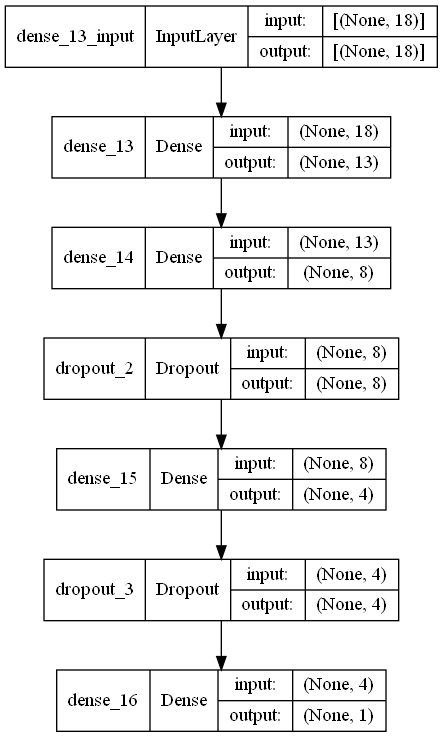

In [68]:
tf.keras.utils.plot_model(seq_model, show_shapes=True)

In [69]:
history_seq = seq_model.fit(train_batches, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
36/36 [==============================] - 2s 21ms/step - loss: 0.7169 - auc: 0.4887 - precision: 0.2590 - recall: 0.4314 - accuracy: 0.5216 - val_loss: 0.6907 - val_auc: 0.5404 - val_precision: 0.3200 - val_recall: 0.4013 - val_accuracy: 0.6149
Epoch 2/100
36/36 [==============================] - 0s 4ms/step - loss: 0.6798 - auc: 0.5090 - precision: 0.2680 - recall: 0.1589 - accuracy: 0.6616 - val_loss: 0.6639 - val_auc: 0.5606 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.7347
Epoch 3/100
36/36 [==============================] - 0s 4ms/step - loss: 0.6537 - auc: 0.5270 - precision: 0.3274 - recall: 0.0309 - accuracy: 0.7260 - val_loss: 0.6317 - val_auc: 0.6088 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.7347
Epoch 4/100
36/36 [==============================] - 0s 5ms/step - loss: 0.6151 - auc: 0.5573 - precision: 0.3226 - recall: 0.0167 - accuracy: 0.7298 - val_loss: 0.5845 - val_auc: 0.6565 - val_precision: 0.0000e+00 - v

Epoch 33/100
36/36 [==============================] - 0s 5ms/step - loss: 0.4866 - auc: 0.7653 - precision: 0.6157 - recall: 0.2826 - accuracy: 0.7628 - val_loss: 0.4356 - val_auc: 0.8407 - val_precision: 0.7485 - val_recall: 0.4281 - val_accuracy: 0.8101
Epoch 34/100
36/36 [==============================] - 0s 5ms/step - loss: 0.4906 - auc: 0.7713 - precision: 0.6146 - recall: 0.3094 - accuracy: 0.7653 - val_loss: 0.4377 - val_auc: 0.8408 - val_precision: 0.7362 - val_recall: 0.4013 - val_accuracy: 0.8030
Epoch 35/100
36/36 [==============================] - 0s 5ms/step - loss: 0.4850 - auc: 0.7657 - precision: 0.6316 - recall: 0.2709 - accuracy: 0.7646 - val_loss: 0.4372 - val_auc: 0.8409 - val_precision: 0.7434 - val_recall: 0.3779 - val_accuracy: 0.8004
Epoch 36/100
36/36 [==============================] - 0s 5ms/step - loss: 0.4792 - auc: 0.7788 - precision: 0.6403 - recall: 0.2977 - accuracy: 0.7692 - val_loss: 0.4353 - val_auc: 0.8406 - val_precision: 0.7209 - val_recall: 0.3110

Epoch 65/100
36/36 [==============================] - 0s 5ms/step - loss: 0.4716 - auc: 0.7862 - precision: 0.6531 - recall: 0.2676 - accuracy: 0.7679 - val_loss: 0.4316 - val_auc: 0.8436 - val_precision: 0.7351 - val_recall: 0.3712 - val_accuracy: 0.7977
Epoch 66/100
36/36 [==============================] - 0s 5ms/step - loss: 0.4702 - auc: 0.7824 - precision: 0.6255 - recall: 0.2793 - accuracy: 0.7644 - val_loss: 0.4313 - val_auc: 0.8433 - val_precision: 0.7483 - val_recall: 0.3579 - val_accuracy: 0.7977
Epoch 67/100
36/36 [==============================] - 0s 5ms/step - loss: 0.4714 - auc: 0.7846 - precision: 0.6204 - recall: 0.2952 - accuracy: 0.7650 - val_loss: 0.4323 - val_auc: 0.8434 - val_precision: 0.7463 - val_recall: 0.3344 - val_accuracy: 0.7933
Epoch 68/100
36/36 [==============================] - 0s 5ms/step - loss: 0.4694 - auc: 0.7857 - precision: 0.6413 - recall: 0.2960 - accuracy: 0.7692 - val_loss: 0.4311 - val_auc: 0.8431 - val_precision: 0.7372 - val_recall: 0.3846

36/36 [==============================] - 0s 5ms/step - loss: 0.4734 - auc: 0.7844 - precision: 0.6348 - recall: 0.2834 - accuracy: 0.7666 - val_loss: 0.4333 - val_auc: 0.8416 - val_precision: 0.7634 - val_recall: 0.3344 - val_accuracy: 0.7959
Epoch 98/100
36/36 [==============================] - 0s 5ms/step - loss: 0.4720 - auc: 0.7879 - precision: 0.6522 - recall: 0.2885 - accuracy: 0.7704 - val_loss: 0.4342 - val_auc: 0.8413 - val_precision: 0.7537 - val_recall: 0.3378 - val_accuracy: 0.7950
Epoch 99/100
36/36 [==============================] - 0s 5ms/step - loss: 0.4727 - auc: 0.7823 - precision: 0.6420 - recall: 0.2834 - accuracy: 0.7679 - val_loss: 0.4341 - val_auc: 0.8410 - val_precision: 0.7540 - val_recall: 0.3177 - val_accuracy: 0.7915
Epoch 100/100
36/36 [==============================] - 0s 5ms/step - loss: 0.4665 - auc: 0.7929 - precision: 0.6279 - recall: 0.2709 - accuracy: 0.7639 - val_loss: 0.4335 - val_auc: 0.8412 - val_precision: 0.7310 - val_recall: 0.3545 - val_accur

## Functional Model - Tuning

In [70]:
tf.keras.backend.clear_session

<function keras.backend.clear_session()>

In [71]:
def get_model_func2(dropout_rate=0.0, init_mode='uniform'):
    input_ = keras.layers.Input(shape=[18])

    nor1 = keras.layers.BatchNormalization()(input_)
    do1 = keras.layers.Dropout(dropout_rate)(nor1)
    hid1 = keras.layers.Dense(16, activation="relu", kernel_initializer=init_mode)(do1)
    con = keras.layers.concatenate([input_,hid1])

    nor2 = keras.layers.BatchNormalization()(con)
    do2 = keras.layers.Dropout(dropout_rate)(nor2)
    hid2 = keras.layers.Dense(8, activation="relu", kernel_initializer=init_mode)(do2)

    nor3 = keras.layers.BatchNormalization()(hid2)
    do3 = keras.layers.Dropout(dropout_rate)(nor3)
    hid3 = keras.layers.Dense(4, activation="relu", kernel_initializer=init_mode)(do3)
    output_ = keras.layers.Dense(1, activation="sigmoid")(hid3)

    model_func2 = keras.models.Model(inputs=[input_], outputs=[output_])
     # Compile model
    model_func2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC','Precision','Recall','accuracy'])
    return model_func2

# create model
model = KerasClassifier(build_fn = get_model_func2, epochs=100, batch_size=128, shuffle = 500)

# define the grid search parameters
init_mode = ['uniform', 'normal', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
param_grid = dict(init_mode=init_mode, dropout_rate=dropout_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Epoch 1/100
36/36 [==============================] - 2s 3ms/step - loss: 0.7099 - auc: 0.5608 - precision: 0.2919 - recall: 0.7258 - accuracy: 0.4600
Epoch 2/100
36/36 [==============================] - 0s 3ms/step - loss: 0.6741 - auc: 0.6752 - precision: 0.4719 - recall: 0.4206 - accuracy: 0.7213
Epoch 3/100
36/36 [==============================] - 0s 3ms/step - loss: 0.6468 - auc: 0.7348 - precision: 0.5556 - recall: 0.3470 - accuracy: 0.7531
Epoch 4/100
36/36 [==============================] - 0s 3ms/step - loss: 0.6076 - auc: 0.7827 - precision: 0.5787 - recall: 0.3813 - accuracy: 0.7621
Epoch 5/100
36/36 [==============================] - 0s 3ms/step - loss: 0.5624 - auc: 0.8016 - precision: 0.5789 - recall: 0.4908 - accuracy: 0.7701
Epoch 6/100
36/36 [==============================] - 0s 3ms/step - loss: 0.5179 - auc: 0.8078 - precision: 0.5891 - recall: 0.4699 - accuracy: 0.7724
Epoch 7/100
36/36 [==============================] - 0s 3ms/step - loss: 0.4897 - auc: 0.8083 - prec

In [72]:
dropout_rate = grid_result.best_params_.get('dropout_rate')
init_mode = grid_result.best_params_.get('init_mode')
def get_model_func2():
    input_ = keras.layers.Input(shape=[18])

    nor1 = keras.layers.BatchNormalization()(input_)
    do1 = keras.layers.Dropout(dropout_rate)(nor1)
    hid1 = keras.layers.Dense(16, activation="relu", kernel_initializer=init_mode)(do1)
    con = keras.layers.concatenate([input_,hid1])

    nor2 = keras.layers.BatchNormalization()(con)
    do2 = keras.layers.Dropout(dropout_rate)(nor2)
    hid2 = keras.layers.Dense(8, activation="relu", kernel_initializer=init_mode)(do2)

    nor3 = keras.layers.BatchNormalization()(hid2)
    do3 = keras.layers.Dropout(dropout_rate)(nor3)
    hid3 = keras.layers.Dense(4, activation="relu", kernel_initializer=init_mode)(do3)
    output_ = keras.layers.Dense(1, activation="sigmoid")(hid3)

    model_func2 = keras.models.Model(inputs=[input_], outputs=[output_])
     # Compile model
    model_func2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC','Precision','Recall','accuracy'])
    return model_func2

In [73]:
model_func2 = get_model_func2()
model_func2.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 18)]         0           []                               
                                                                                                  
 batch_normalization_13 (BatchN  (None, 18)          72          ['input_3[0][0]']                
 ormalization)                                                                                    
                                                                                                  
 dropout_7 (Dropout)            (None, 18)           0           ['batch_normalization_13[0][0]'] 
                                                                                                  
 dense_21 (Dense)               (None, 16)           304         ['dropout_7[0][0]']        

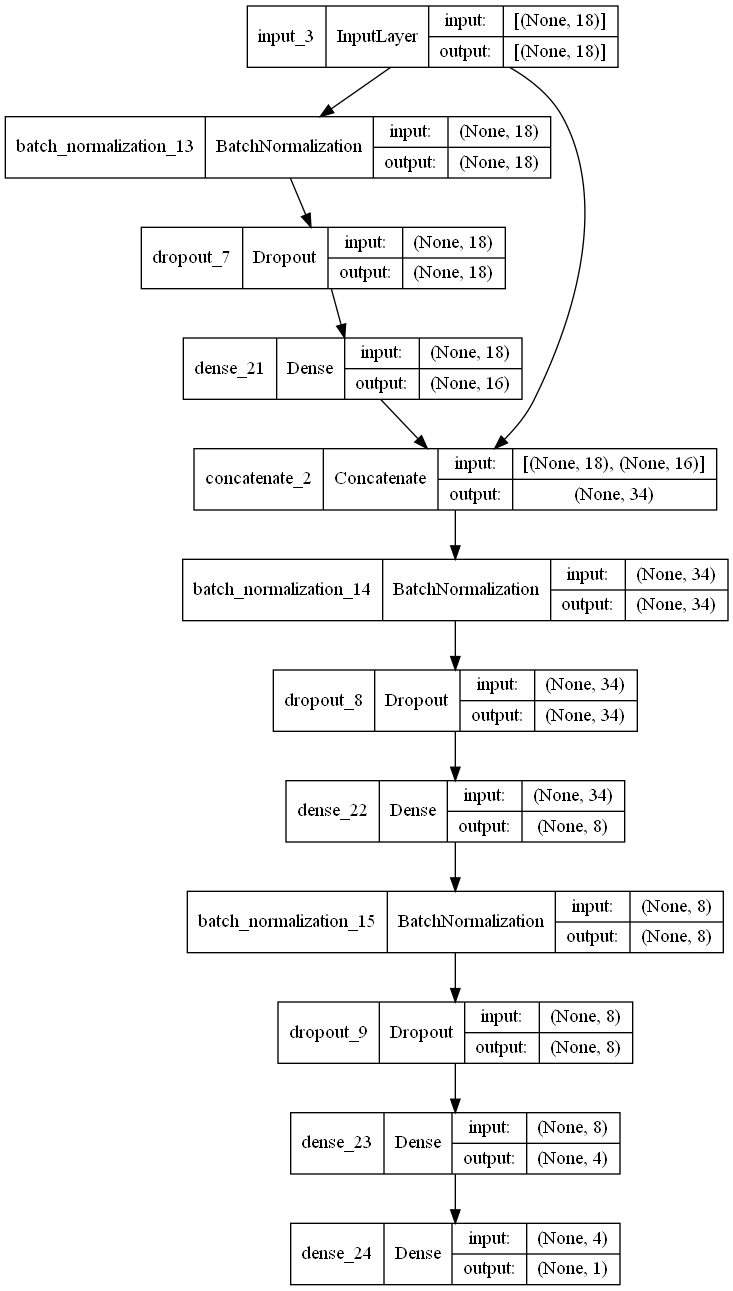

In [74]:
tf.keras.utils.plot_model(model_func2, show_shapes=True)

In [75]:
history_func2 = model_func2.fit(train_batches, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
36/36 [==============================] - 3s 23ms/step - loss: 0.6638 - auc: 0.5889 - precision: 0.2997 - recall: 0.2734 - accuracy: 0.6377 - val_loss: 0.6657 - val_auc: 0.7161 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.7347
Epoch 2/100
36/36 [==============================] - 0s 5ms/step - loss: 0.5941 - auc: 0.7419 - precision: 0.4755 - recall: 0.0811 - accuracy: 0.7324 - val_loss: 0.6174 - val_auc: 0.7990 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.7347
Epoch 3/100
36/36 [==============================] - 0s 6ms/step - loss: 0.5255 - auc: 0.7900 - precision: 0.6433 - recall: 0.1689 - accuracy: 0.7546 - val_loss: 0.5531 - val_auc: 0.8237 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.7347
Epoch 4/100
36/36 [==============================] - 0s 6ms/step - loss: 0.4847 - auc: 0.7993 - precision: 0.5855 - recall: 0.4381 - accuracy: 0.7686 - val_loss: 0.5027 - val_auc: 0.8316 - val_precision: 0.0000

Epoch 33/100
36/36 [==============================] - 0s 7ms/step - loss: 0.4417 - auc: 0.8211 - precision: 0.6134 - recall: 0.4883 - accuracy: 0.7826 - val_loss: 0.4232 - val_auc: 0.8428 - val_precision: 0.6870 - val_recall: 0.5284 - val_accuracy: 0.8110
Epoch 34/100
36/36 [==============================] - 0s 7ms/step - loss: 0.4448 - auc: 0.8199 - precision: 0.6355 - recall: 0.4724 - accuracy: 0.7881 - val_loss: 0.4227 - val_auc: 0.8431 - val_precision: 0.6870 - val_recall: 0.5284 - val_accuracy: 0.8110
Epoch 35/100
36/36 [==============================] - 0s 6ms/step - loss: 0.4374 - auc: 0.8270 - precision: 0.6299 - recall: 0.4682 - accuracy: 0.7859 - val_loss: 0.4238 - val_auc: 0.8423 - val_precision: 0.7027 - val_recall: 0.5217 - val_accuracy: 0.8146
Epoch 36/100
36/36 [==============================] - 0s 6ms/step - loss: 0.4387 - auc: 0.8243 - precision: 0.6306 - recall: 0.4582 - accuracy: 0.7850 - val_loss: 0.4235 - val_auc: 0.8423 - val_precision: 0.6943 - val_recall: 0.5318

36/36 [==============================] - 0s 6ms/step - loss: 0.4357 - auc: 0.8279 - precision: 0.6419 - recall: 0.4691 - accuracy: 0.7897 - val_loss: 0.4217 - val_auc: 0.8431 - val_precision: 0.7129 - val_recall: 0.4983 - val_accuracy: 0.8137
Epoch 66/100
36/36 [==============================] - 0s 5ms/step - loss: 0.4298 - auc: 0.8333 - precision: 0.6513 - recall: 0.4858 - accuracy: 0.7945 - val_loss: 0.4222 - val_auc: 0.8425 - val_precision: 0.7295 - val_recall: 0.5050 - val_accuracy: 0.8190
Epoch 67/100
36/36 [==============================] - 0s 6ms/step - loss: 0.4353 - auc: 0.8280 - precision: 0.6391 - recall: 0.4783 - accuracy: 0.7899 - val_loss: 0.4239 - val_auc: 0.8409 - val_precision: 0.7246 - val_recall: 0.5017 - val_accuracy: 0.8172
Epoch 68/100
36/36 [==============================] - 0s 6ms/step - loss: 0.4399 - auc: 0.8244 - precision: 0.6312 - recall: 0.4465 - accuracy: 0.7839 - val_loss: 0.4239 - val_auc: 0.8412 - val_precision: 0.7163 - val_recall: 0.5151 - val_accura

## Model Evaluation - Tunned Sequential ANN

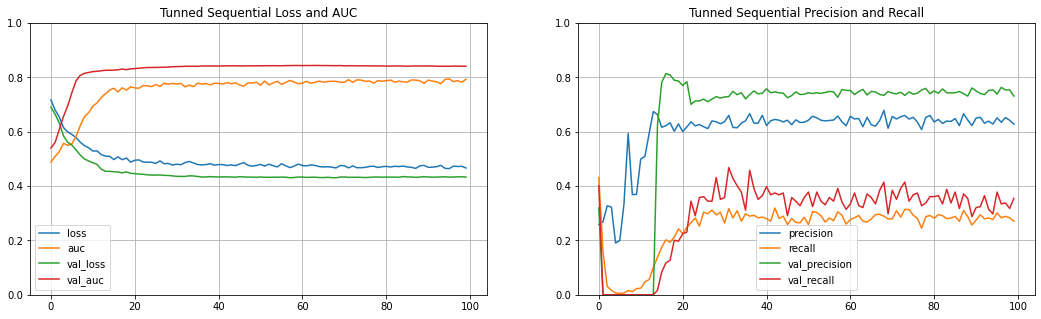

In [76]:
#Evaluation Tunned Sequential API
loss_auc = {x: history_seq.history[x] for x in ['loss', 'auc','val_loss', 'val_auc']}
prec_rec = {x: history_seq.history[x] for x in ['precision','recall','val_precision','val_recall']}

fig, ax = plt.subplots(1,2,figsize=(18, 5))

plt.rcParams['axes.grid'] = True
plt.setp(ax, ylim=(0,1))
pd.DataFrame(loss_auc).plot(ax=ax[0])
ax[0].set_title('Tunned Sequential Loss and AUC')
pd.DataFrame(prec_rec).plot(ax=ax[1])
ax[1].set_title('Tunned Sequential Precision and Recall')

plt.show()

---

## Model Evaluation - Tunned Functional API ANN

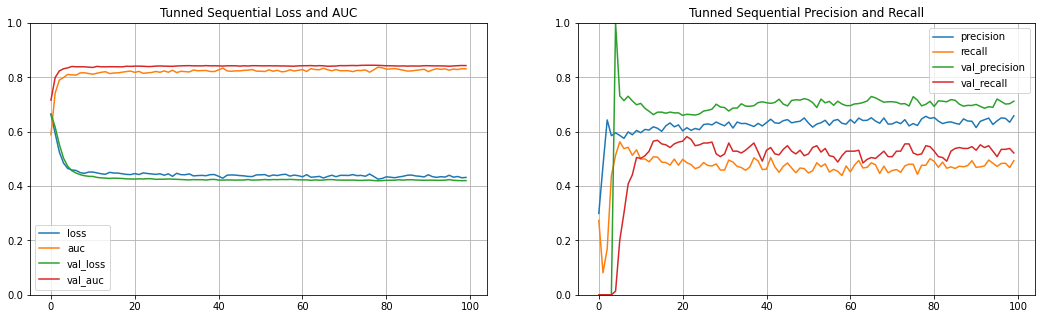

In [77]:
#Evaluation Tunned Sequential API
loss_auc = {x: history_func2.history[x] for x in ['loss', 'auc','val_loss', 'val_auc']}
prec_rec = {x: history_func2.history[x] for x in ['precision','recall','val_precision','val_recall']}

fig, ax = plt.subplots(1,2,figsize=(18, 5))

plt.rcParams['axes.grid'] = True
plt.setp(ax, ylim=(0,1))
pd.DataFrame(loss_auc).plot(ax=ax[0])
ax[0].set_title('Tunned Sequential Loss and AUC')
pd.DataFrame(prec_rec).plot(ax=ax[1])
ax[1].set_title('Tunned Sequential Precision and Recall')

plt.show()

## Evaluasi model dengan data test

In [78]:
#evaluasi model yang sudah ditunning
test_seq = seq_model.evaluate(X_test, y_test)
test_func = model_func2.evaluate(X_test, y_test)
test =[test_seq, test_func]

    
#buat ke dalam dataframe
model_eval = pd.DataFrame([x for x in test], 
                    columns=['Loss','AUC','Precision','Recall', 'Accuracy'])
model_eval = pd.concat([pd.Series(['Tunned Sequential Model', 'Tunned Functional API Model'], 
                            name = 'Model'),model_eval], axis=1)
model_eval

45/45 [==============================] - 0s 2ms/step - loss: 0.4255 - auc: 0.8373 - precision: 0.6486 - recall: 0.5134 - accuracy: 0.7970


,Model,Loss,AUC,Precision,Recall,Accuracy
0,Tunned Sequential Model,0.432937,0.838070,0.703125,0.360963,0.789922
1,Tunned Functional API Model,0.425546,0.837321,0.648649,0.513369,0.797019


- Dari hasil kedua model yang dilakukan grid search, tampak bahwa Tunned Functional Model lebih unggul secara keseluruhan :
    - Recall dan Accuracy lebih tinggi sedikit daripada Tunned Sequential API Model
    - Nilai Loss lebih kecil, meskipun tidak signifikan
- Meskipun nilai AUC, namun tidak signifikan sehingga dapat diabaikan.
- Nilai Precision lebih kecil dari sequential model, namun dalam kasus ini nilai recall lebih dipertimbangkan agar kemungkinan churn dapat diantisipasi.
- Model yang akan digunakan sebagai Model Inference adalah Tunned Functional API Model.

# 10. Model Saving

In [79]:
model_func2.save('saved_model/my_func_model')
model_func2.save('my_func_model.h5') 

INFO:tensorflow:Assets written to: saved_model/my_func_model\assets


# 11. Model Inference

In [80]:
#Predict test dataset dengan model tunned sequential model
y_pred = (model_func2.predict(X_test) > 0.5).astype('int32')

In [81]:
#bandingkan hasil prediksi dan hasil sebenarnya pada y_test
pred = pd.DataFrame(y_pred, columns=['y_pred'])
test = pd.DataFrame(np.array(y_test), columns=['y_test'])

pred_test = pd.concat([pred, test], axis=1)
pred_test.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

In [82]:
#hitung hasil prediksi sesuai
true = pd.DataFrame(pred_test[pred_test['y_pred']==pred_test['y_test']].value_counts(), columns = ['True'])
true

,,True
y_pred,y_test,
0,0,931
1,1,192


In [83]:
#hitung hasil prediksi tidak sesuai
false = pd.DataFrame(pred_test[pred_test['y_pred']!=pred_test['y_test']].value_counts(), columns = ['False'])
false 

,,False
y_pred,y_test,
0,1,182
1,0,104


In [84]:
# persentase prediksi salah
wrong_pred = (false.values[0] + false.values[1]) / (true.values[0] + true.values[1] + false.values[0] + false.values[1])*100

In [85]:
wrong_predstr = ' '.join([str(elem) for elem in np.round(wrong_pred,2)])
print(f'wrong prediction {wrong_predstr}%')


wrong prediction 20.3%


- Terdapat kesalahan prediksi sekitar 20%, yang mana berarti akurasi model ini sekitar 80%.

# 12. Conclusions

## EDA Analysis
- Hanya terdapat sedikit senior citizen pada dataset.
- Churn rate :
    - Terdapat 5174 pelanggan (73.46%) melanjutkan berlangganan.
    - Hanya 1869 pelanggan (26.53%) yang berhenti berlangganan.
- Sebagian besar pelanggan tidak memiliki tanggungan.
- Untuk pelanggan yang memiliki layanan telepon, lebih banyak pelanggan yang tidak memiliki multiple lines (namun tidak signifikan perbedaannya)
- Sebagian besar pelanggan memiliki layanan internet dengan fiber optic.
- Hanya sedikit pelanggan yang memiliki layanan online_security, online_backup, device protection dan tech support.
- Kebanyakan pelanggan memilih kontrak bayaran per bulan dari pada per tahun atau per dua tahun.
- Lebih banyak yang menggunakan paperless billing.
- Pelanggan yang hanya menggunakan layanan telepon tanpa internet rata-rata hanya membayar 662 setiap akhir kuartal, sedangkan rata-rata yang dibayarkan pelanggan secara keseluruhan adalah sekitar 2279, yang berarti pelanggan yang hanya menggunakan layanan telepon hanya membayar sekitar 30% dari rata-rata seluruh pelanggan lainnya.
- Hanya sekitar 1:12 pelanggan yang hanya berlangganan layanan telepon yang churn.



- Saran kepada perusahaan :
    - Melakukan campaign untuk layanan online_security, online_backup, device protection dan tech support agar dapat menaikkan omeset perusahaan.
    - Senior Citizen merupakan kelompok minoritas, namun kelompok ini perlu mendapat perhatian khusus karena memiliki tinggkat churn rate yang relatif lebih tinggi dibandingkan dengan kelompok non-senior citizen.
    - Pelanggan yang hanya mengunakan layanan telepon cenderung lebih loyal kepada perusahaan, sehingga dapat diasumsikan layanan telepon perusahaan memuaskan. Namun  Oleh karena itu kemungkinan layanan internet pada perusahaan perlu ditingkatkan mengingat churn rate pada pelanggan dengan layanan internet lebih tinggi daripada yang hanya berlangganan layanan telepon.
    

## Model Analysis

- Sequential model merupakan model cukup simpel dan mudah untuk diaplikasikan. Model ini cocok digunakan pada dataset dengan single output seperti pada dataset yang saat ini digunakan.
- Basic sequential model menghasilkan akurasi dan loss yang cukup baik, yaitu sebagai berikut :
     - train_loss: 0.4001 --- train_accuracy: 0.8083
     - val_loss: 0.4283   --- val_accuracy: 0.8012
     - test_loss : 0.4295 --- test_accuracy : 0.7970
     
- Functional API dikenal sebagai model yang lebih fleksibel daripada sequential API. Functional API dapat melakukan sharing layers dan juga dapat memiliki multiple inputs and outputs.
- Basic Functional API model menunjukkan sedikit peningkatan pada akurasi train, namun mengalami penurunan nilai akurasi pada data validasi dan test bila dibandingkan dengan basic sequential model, yaitu sebagai berikut: 
     - train_loss: 0.3766 ----- train_accuracy: 0.8112 
     - val_loss  : 0.4543 ----- val_accuracy  : 0.7817
     - test_loss : 0.4666 ----- test_accuracy : 0.7927
     
     
- Setelah melakukan grid search pada basic sequential model dan basic functional model, diperoleh sequential model yang telah dituning memiliki keunggulan dari sisi AUC dan Precision, namun Tunned Functional API Model memiliki nilai loss, akurasi, dan recall yang lebih baik sehingga yang dipilih sebagai model untuk dilakukan model inference adalah Tunned Functional API Model.

- Hasil evaluasi Tunned Functional Model dengan data test adalah sebagai berikut :
    - Loss : 0.425546
    - AUC :	0.837321
    - Precision : 0.648649
    - Recall : 0.513369
    - Accuracy : 0.797019
				
- Model yang telah dibuat masih jauh dari kesempurnaan, sehingga peningkatan perfomansi model masih dapat dilakukan. 
- Functional API memiliki potensi untuk dikembangkan lebih baik lagi dengan melakukan gridsearch menggunakan hyperparameter yang lebih bervariasi dengan kombinasi yang lebih banyak.